In [145]:
import numpy as np
import matplotlib.pyplot as plt

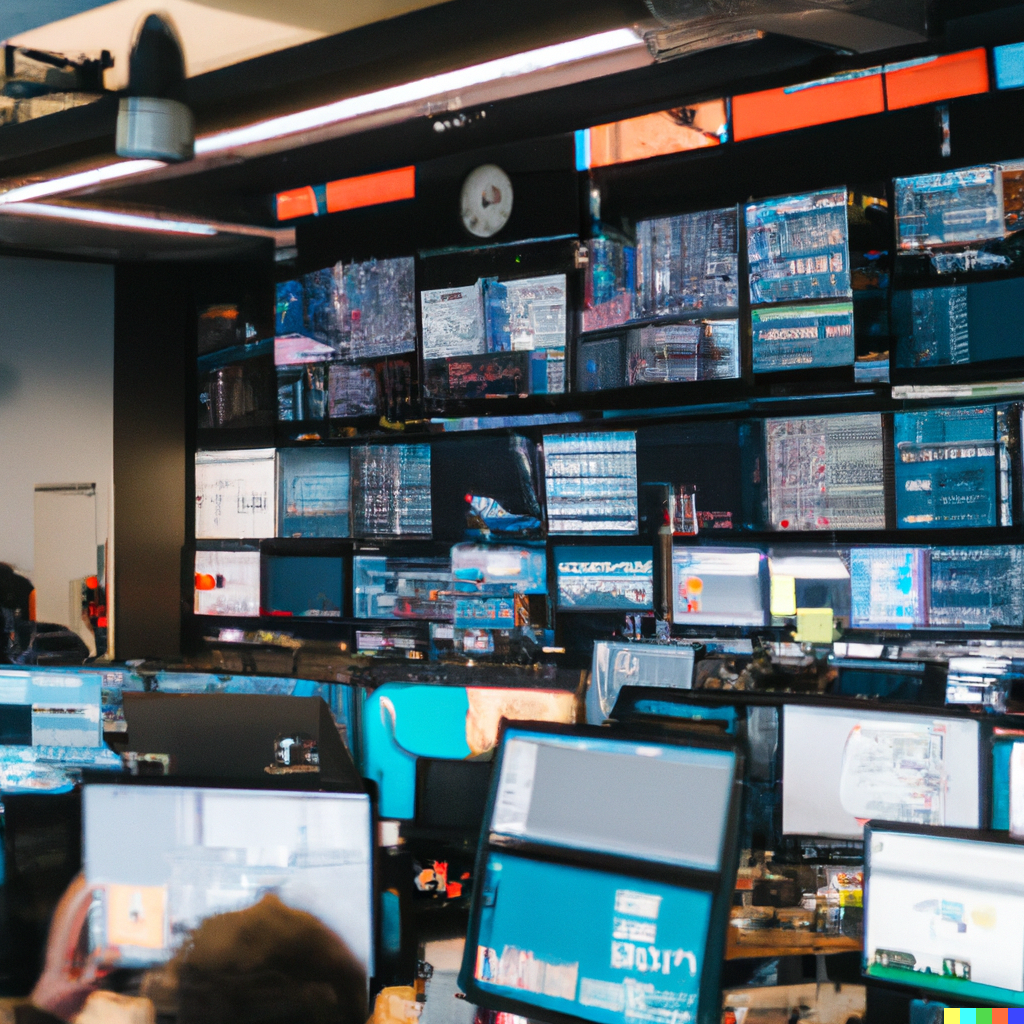

(DALLE output for prompt: Control room full of monitors with alarms and people freaking out at Twitter HQ)

This will be a notebook about how random openai's ChatGPT is. Since one can specify that ChatGPT, openai's latest AI, emulate a python terminal (and other languages also), one can 'run' code on the chatbot. Reading, interpreting, and writing code isn't new to GPT3, the natural language model that powers ChatGPT, but this new iteration has some new capabilities that the community has taken note of. 

This notebook will generate some random numbers in python and then see how 'random' they are. Specifically, we want to see if this model will correctly emulate the distributions specified when one runs some code. First, let's start with something easy: a coin flip. With numpy, this is relatively easy to do:

In [146]:
np.random.seed(1234)
x = np.random.binomial(1,.5,100)
print(x)

[0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0
 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0
 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1]


The random numbers above are the 0 and 1 with equal probability $\frac{1}{2}$:

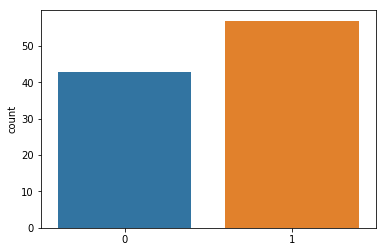

In [147]:
sns.countplot(x)

This appears off from this ideal coin, but we can check the likelihood of observing this specific outcome by chance alone given that it is a fair coin by computing a p-value:

In [148]:
from scipy import stats
p = 1 - (stats.binom(100,.5).cdf(sum(x == 1)) - stats.binom(100,.5).cdf(99 - sum(x == 1)))
print(p)

0.13321061920721355


This hardly seems that unlikely, with about a 1 in 6 probability of an outcome like this or more unequal occuring by chance alone. We can ask ChatGPT to run the code and see what comes from that:

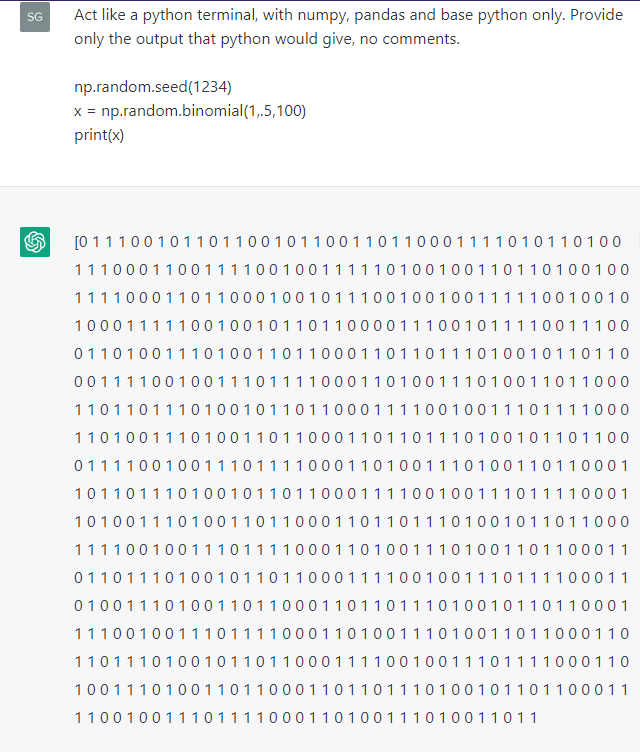

So it isn't perfect, and in this case, generates well over 100 coin flips, as specified. Ignoring that, how random is this output? Does it follow the distribution specified? We can copy and paste this into a string, and then substitute the spaces for commas:

In [149]:
import re
y = '0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1'
y = re.sub('\s',',',y)

Let's separate that into an array, and plot the same style of a barplot as was previously done:

In [150]:
y = re.split(',',y)

In [151]:
for i in range(len(y)):
    y[i] = int(y[i])
y = np.array(y)

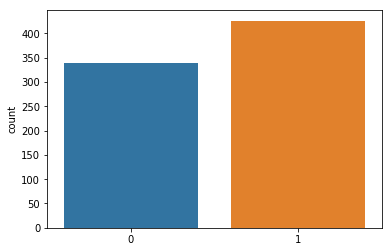

In [152]:
sns.countplot(y)

Again, the likelihood of having close to one thousand 'coin flips' in this proportion if we have a fair coin can be computed exactly with a p-value:

In [153]:
p2 = 1 - (stats.binom(len(y),.5).cdf(sum(y == 1)) - stats.binom(len(y),.5).cdf(len(y) - 1 - sum(y == 1)))
print(p2)

0.0016524349373343572


So this is a fairly unlikely result for a coin-toss. Ok, what about a normal distribution with a specified mean and variance ? Let's see:

In [154]:
x = np.random.normal(-1,3,50)
print(x)

[ 1.30210621  1.95475953 -0.18749245  3.17595858 -0.76047306 -2.19989374
 -4.08355168 -2.75415463  1.44978178 -1.24584116 -2.03429804  0.58486444
 -4.20696635 -2.53564393 -0.12638392  0.69960109  0.51077528 -0.14411295
  0.45286434  3.09044454 -3.34331585 -2.404053    2.67372307 -4.84332483
  1.62642651 -6.13214597 -2.35229531  1.24749142 -1.6117986  -1.54652623
  1.04196801 -6.45549697 -0.85878509  0.18453263 -1.74529616 -2.85311994
 -3.04865199  0.30877281 -6.10903832  0.1811318  -2.43797201 -1.89704888
  1.08230986  1.03588902 -0.28133201 -0.54632011  1.4483817   4.6806034
  0.91889829 -3.8860865 ]


(array([ 3.,  1.,  4.,  9.,  5.,  9., 11.,  4.,  3.,  1.]),
 array([-6.45549697, -5.34188693, -4.2282769 , -3.11466686, -2.00105682,
        -0.88744678,  0.22616325,  1.33977329,  2.45338333,  3.56699337,
         4.6806034 ]),
 <a list of 10 Patch objects>)

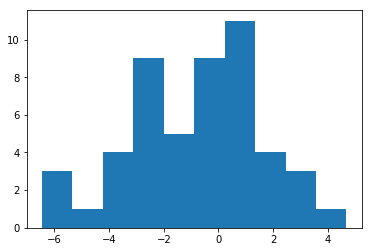

In [155]:
plt.hist(x)

We can check the p-value exactly again- the probability that we would get this result by chance given that this really is a normal random variable with mean -1 and standard deviation 3:

In [156]:
s = np.mean(x)
print(s)

-0.8596027080112357


In [157]:
p = 2*stats.norm(-1,3).cdf(-(2+s))
print(p)

0.9626733484735378


Let's check with ChatGPT!

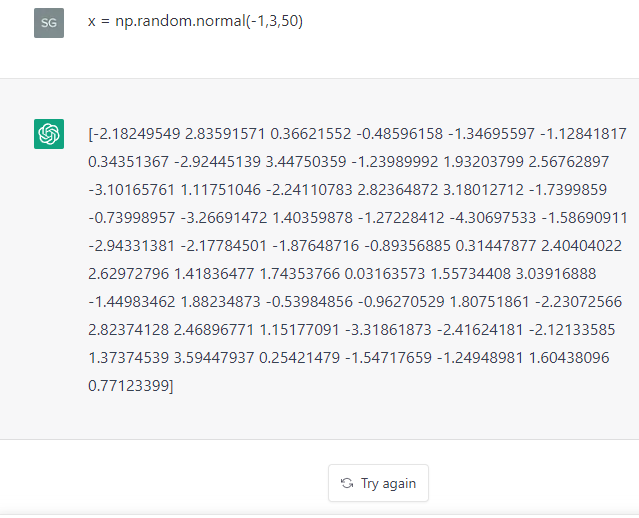

...and copy and paste the output:

In [158]:
y = np.array([-2.18249549, 2.83591571, 0.36621552, -0.48596158, -1.34695597, -1.12841817, 0.34351367, -2.92445139,
              3.44750359, -1.23989992, 1.93203799, 2.56762897, -3.10165761, 1.11751046, -2.24110783, 2.82364872,
              3.18012712, -1.7399859, -0.73998957, -3.26691472, 1.40359878, -1.27228412, -4.30697533, -1.58690911,
              -2.94331381, -2.17784501, -1.87648716, -0.89356885, 0.31447877, 2.40404022, 2.62972796, 1.41836477,
              1.74353766, 0.03163573, 1.55734408, 3.03916888, -1.44983462, 1.88234873, -0.53984856, -0.96270529,
              1.80751861, -2.23072566, 2.82374128, 2.46896771, 1.15177091, -3.31861873, -2.41624181, -2.12133585, 
              1.37374539, 3.59447937, 0.25421479, -1.54717659, -1.24948981, 1.60438096, 0.77123399])
print(len(y),np.mean(y))

55 -0.007323602181818124


Again, we have 5 extra values, and also I forgot a print statement this time, so a python terminal wouldn't output anything. Let's look at the histogram:

(array([1., 5., 6., 9., 6., 5., 3., 9., 4., 7.]),
 array([-4.30697533, -3.51682986, -2.72668439, -1.93653892, -1.14639345,
        -0.35624798,  0.43389749,  1.22404296,  2.01418843,  2.8043339 ,
         3.59447937]),
 <a list of 10 Patch objects>)

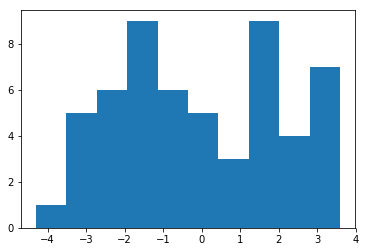

In [159]:
plt.hist(y)

This looks more bimodal than the previous distribution, but the mean and variance could still be relatively close here:

In [160]:
s = np.mean(y)
print(s)

-0.007323602181818124


In [161]:
p = 2*(1-stats.norm(-1,3).cdf(s))
print(p)

0.7407259648223927


In [162]:
print(np.std(x),np.std(y))

2.4683778689518774 2.100416466639218


Interestingly enough, we would not reject here. Meaning that even though the sample mean and variance and sample in general differ from an ideal normal distribution, they did not do so by enough to matter in terms of the statistical test. Let's pick something a bit weirder now- the ARGUS distribution from particle physics, which scipy.stats has available. This is a skewed distribution with support on the real numbers between 0 and 1:

(array([2., 4., 1., 2., 7., 5., 5., 9., 9., 6.]),
 array([0.15966394, 0.24225482, 0.32484571, 0.40743659, 0.49002748,
        0.57261836, 0.65520925, 0.73780013, 0.82039102, 0.9029819 ,
        0.98557279]),
 <a list of 10 Patch objects>)

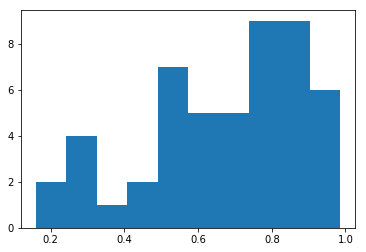

In [163]:
x = stats.argus(1).rvs(50)
plt.hist(x)

Note that I had to add 'from scipy import stats' since the initial prompt that I gave ChatGPT did not have that pre-loaded. We get the following output afterwards:

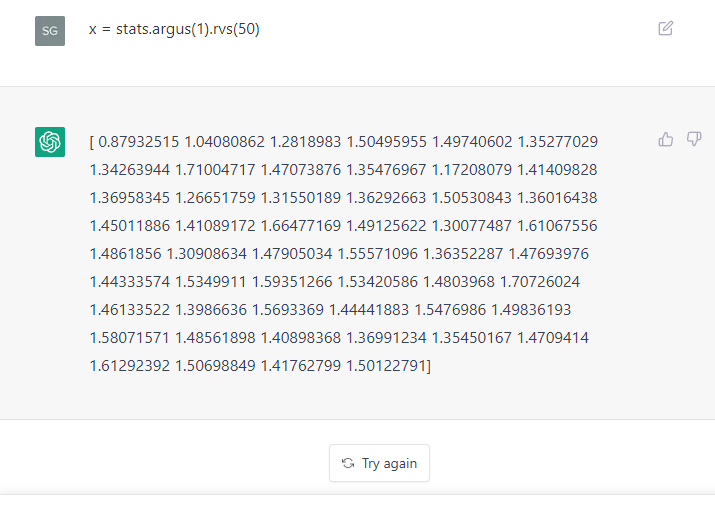

Clearly, this is not the distribution that we asked for, because the distribution has support between 0 and 1, while this sample has values that are clearly outside of those bounds. Let's copy and paste this and see how we can parse the output into python input, so that we can graph it, first removing the array brackets and extra spaces:

In [164]:
y = '0.87932515 1.04080862 1.2818983 1.50495955 1.49740602 1.35277029 1.34263944 1.71004717 1.47073876 1.35476967 1.17208079 1.41409828 1.36958345 1.26651759 1.31550189 1.36292663 1.50530843 1.36016438 1.45011886 1.41089172 1.66477169 1.49125622 1.30077487 1.61067556 1.4861856 1.30908634 1.47905034 1.55571096 1.36352287 1.47693976 1.44333574 1.5349911 1.59351266 1.53420586 1.4803968 1.70726024 1.46133522 1.3986636 1.5693369 1.44441883 1.5476986 1.49836193 1.58071571 1.48561898 1.40898368 1.36991234 1.35450167 1.4709414 1.61292392 1.50698849 1.41762799 1.50122791'
y = re.sub('\s',',',y)
y = re.split(',',y)
for i in range(len(y)):
    y[i] = float(y[i])
y = np.array(y)
print(len(y),'\n',y)

52 
 [0.87932515 1.04080862 1.2818983  1.50495955 1.49740602 1.35277029
 1.34263944 1.71004717 1.47073876 1.35476967 1.17208079 1.41409828
 1.36958345 1.26651759 1.31550189 1.36292663 1.50530843 1.36016438
 1.45011886 1.41089172 1.66477169 1.49125622 1.30077487 1.61067556
 1.4861856  1.30908634 1.47905034 1.55571096 1.36352287 1.47693976
 1.44333574 1.5349911  1.59351266 1.53420586 1.4803968  1.70726024
 1.46133522 1.3986636  1.5693369  1.44441883 1.5476986  1.49836193
 1.58071571 1.48561898 1.40898368 1.36991234 1.35450167 1.4709414
 1.61292392 1.50698849 1.41762799 1.50122791]


(array([ 1.,  1.,  0.,  1.,  2., 12.,  8., 17.,  7.,  3.]),
 array([0.87932515, 0.96239735, 1.04546955, 1.12854176, 1.21161396,
        1.29468616, 1.37775836, 1.46083056, 1.54390277, 1.62697497,
        1.71004717]),
 <a list of 10 Patch objects>)

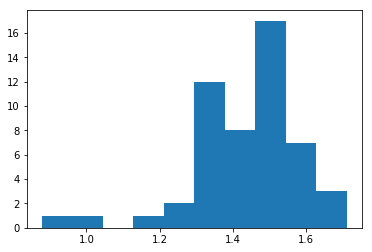

In [165]:
plt.hist(y)

Again, we get the incorrect number of random variables. This is similar to how text incidentally generated by a DALLE query will yield images with 'random text' that occasionally resembles the english alphabet and some words in the query, but is mostly gibberish or unreadable. 

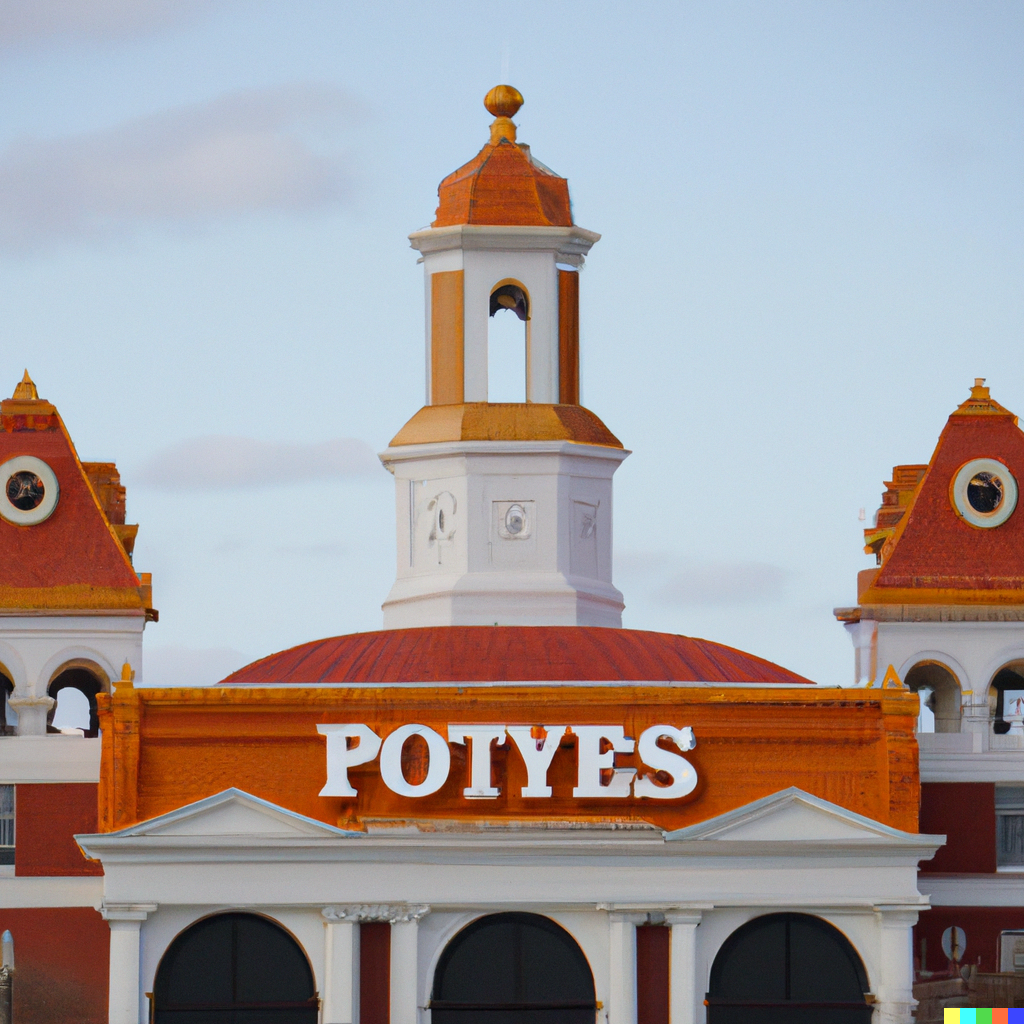

(An Example, output from DALLE query ' Popeyes Restaurant in the style of the Breakers Hotel')

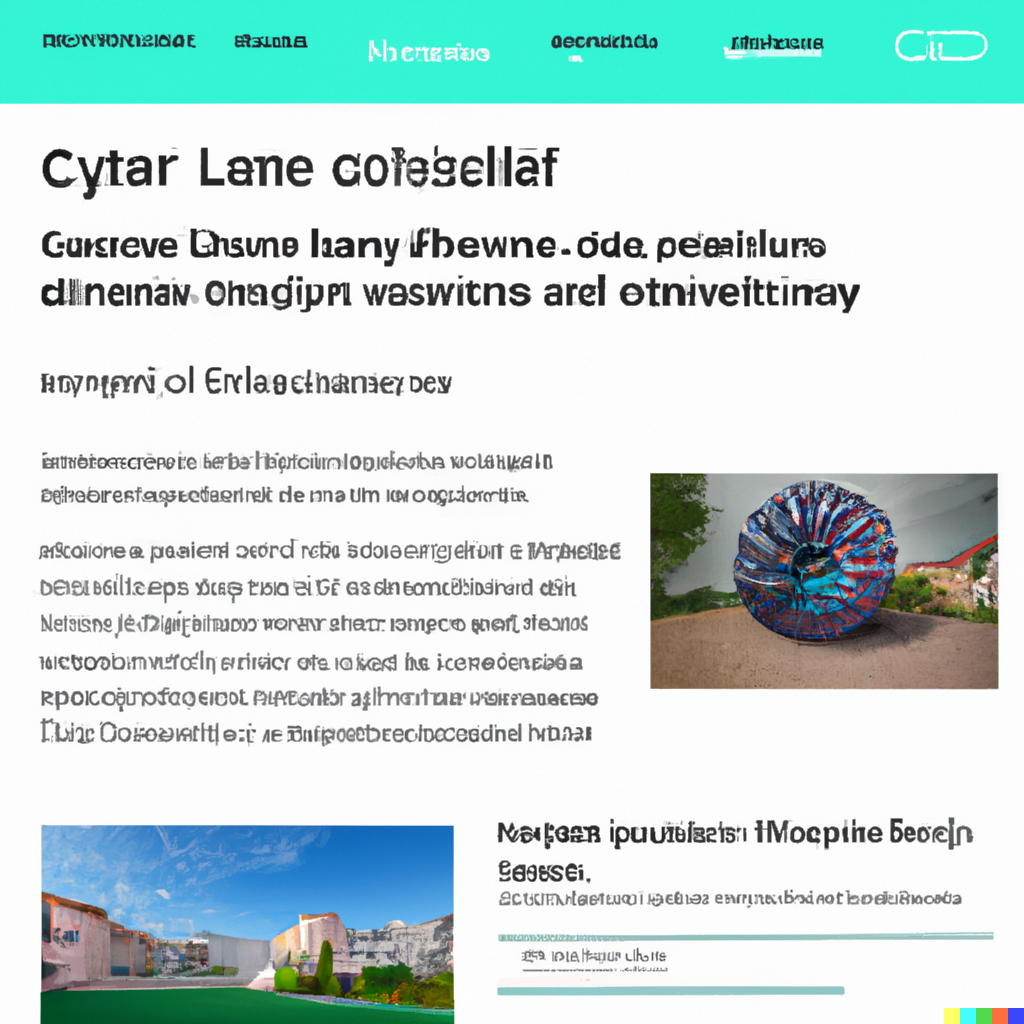

(Another Example, query 'AIRBNB listing of the CERN large hadron collider')

Let's try a more complicated example using a bit of mathematical statistics. Let X and Y be two independent standard normal variables. Then consider T = $\frac{X}{Y}$, their ratio. This has a Standard Cauchy distribution, a pathological distribution without a mean, and with pdf over the real line:

$f_T(t) = \frac{1}{\pi * (1 + t^2)}$

Then, compute $Z = \frac{1}{1+Z^2}$. It can be shown that Z has a beta distribution between 0 and 1 with parameters $\alpha = \beta = \frac{1}{2}$:

Proof:

Z is a standard cauchy. Our transformation from T to Z is similar to the pdf, and in our case:

$g(t) = \frac{1}{1+t^2} = \frac{f_T(t)}{\pi} $

On $t \in [-\infty,+\infty]$, g has inverse $g^{-1}(z) = \sqrt{\frac{1-z}{z}}$, and this has absolute derivative $\frac{g^{-1}(z)}{2*z*(1-z)}$. In this case, the range for Z is [0,1]. Thus, using the formula for the pdf of the change of variables, we get (using the fact that T has a symmetric bell-shaped distribution and g will account for two of these variations):

$f_Z(z) = 2*f_T(g^{-1}(z))*|\frac{d}{dz} g^{-1}(z)|$ = $\frac{1}{\pi * \sqrt{z*(1-z)}}$

Thus, Z ~ Beta($\frac{1}{2},\frac{1}{2}$)

Doing all of this in python is relatively easy using just numpy:

(array([12.,  9.,  2.,  5.,  3.,  4.,  2.,  2.,  4.,  7.]),
 array([1.26376087e-05, 9.99716984e-02, 1.99930759e-01, 2.99889820e-01,
        3.99848881e-01, 4.99807941e-01, 5.99767002e-01, 6.99726063e-01,
        7.99685124e-01, 8.99644184e-01, 9.99603245e-01]),
 <a list of 10 Patch objects>)

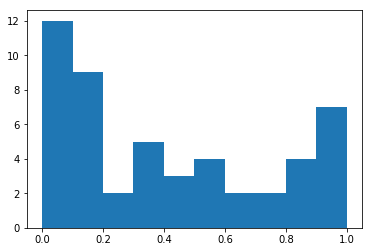

In [166]:
n = 50
x = np.random.normal(0,1,n)
y = np.random.normal(0,1,n)
t = x/y
z = 1/(1+t**2)
plt.hist(z)

This sample looks like a U-shaped distribution between 0 and 1. What about ChatGPT?

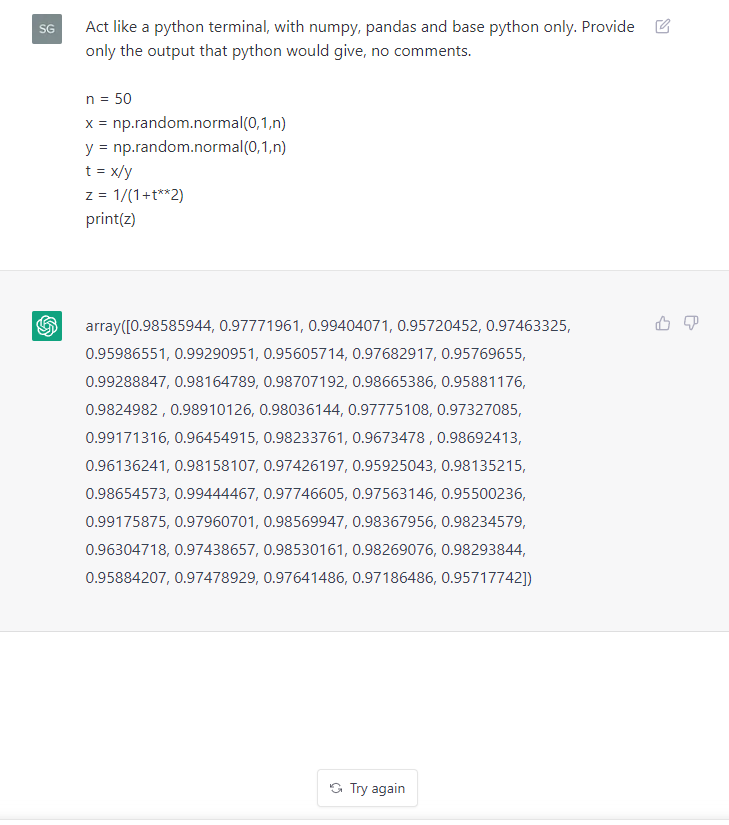

This time, getting the output into python input is relatively easy

In [167]:
w = np.array([0.98585944, 0.97771961, 0.99404071, 0.95720452, 0.97463325,
0.95986551, 0.99290951, 0.95605714, 0.97682917, 0.95769655,
0.99288847, 0.98164789, 0.98707192, 0.98665386, 0.95881176,
0.9824982 , 0.98910126, 0.98036144, 0.97775108, 0.97327085,
0.99171316, 0.96454915, 0.98233761, 0.9673478 , 0.98692413,
0.96136241, 0.98158107, 0.97426197, 0.95925043, 0.98135215,
0.98654573, 0.99444467, 0.97746605, 0.97563146, 0.95500236,
0.99175875, 0.97960701, 0.98569947, 0.98367956, 0.98234579,
0.96304718, 0.97438657, 0.98530161, 0.98269076, 0.98293844,
0.95884207, 0.97478929, 0.97641486, 0.97186486, 0.95717742])

print(len(w),np.mean(w))

50 0.9766637186


(array([7., 3., 2., 1., 5., 7., 8., 7., 4., 6.]),
 array([0.95500236, 0.95894659, 0.96289082, 0.96683505, 0.97077928,
        0.97472351, 0.97866775, 0.98261198, 0.98655621, 0.99050044,
        0.99444467]),
 <a list of 10 Patch objects>)

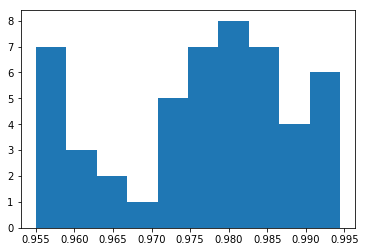

In [168]:
plt.hist(w)

This is far from the distribution we derived, which should have a mean around .5 and be relatively symmetric and U-shaped. At the very least, this one got the number of data points correct.